In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 72
EPOCHS = 10
NUM_CLASSES = 10

# Path to the directory containing your dataset
DATASET_DIR = "2750"

# Load the VGG16 model without the top layer (include_top=False) and specify the input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new top layer for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Load and preprocess the dataset
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


In [1]:

# Train the model
max_avg_acc = -1  # variable to track maximum average accuracy
max_avg_epoch = -1  # variable to store the corresponding epoch
for epoch in range(EPOCHS):
    # Fit the model for one epoch
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE
    )

    # Calculate average accuracy for this epoch
    train_accuracy = np.mean(history.history['accuracy'])
    val_accuracy = np.mean(history.history['val_accuracy'])
    avg_acc = (train_accuracy + val_accuracy) / 2

    # Print the average accuracy for this epoch
    print(f"Epoch {epoch + 1}: Average accuracy: {avg_acc:.4f}")

    # Check if the average accuracy for this epoch is higher than the current maximum
    if avg_acc > max_avg_acc:
        max_avg_acc = avg_acc
        max_avg_epoch = epoch + 1  # store the epoch (add 1 to start from 1 instead of 0)

# Print the maximum average accuracy achieved
print(f"Maximum average accuracy ({max_avg_acc:.4f}) achieved at epoch {max_avg_epoch}.")

# Evaluate the model
validation_predictions = model.predict(validation_generator)
predicted_classes = np.argmax(validation_predictions, axis=1)
true_classes = validation_generator.classes

# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

# Print the simplified classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)






Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


300/300 [==============================] - 1236s 4s/step - loss: 1.0425 - accuracy: 0.6462 - val_loss: 0.7456 - val_accuracy: 0.7576
Epoch 1: Average accuracy: 0.7019
300/300 [==============================] - 1635s 5s/step - loss: 0.6536 - accuracy: 0.7776 - val_loss: 0.6359 - val_accuracy: 0.7719
Epoch 2: Average accuracy: 0.7747
300/300 [==============================] - 1261s 4s/step - loss: 0.5627 - accuracy: 0.8029 - val_loss: 0.5863 - val_accuracy: 0.7920
Epoch 3: Average accuracy: 0.7975
300/300 [==============================] - 1765s 6s/step - loss: 0.5149 - accuracy: 0.8202 - val_loss: 0.5129 - val_accuracy: 0.8217
Epoch 4: Average accuracy: 0.8209
300/300 [==============================] - 1953s 7s/step - loss: 0.4690 - accuracy: 0.8368 - val_loss: 0.5073 - val_accuracy: 0.8161
Epoch 5: Average accuracy: 0.8264
300/300 [==============================] - 1586s 5s/step - loss: 0.4457 

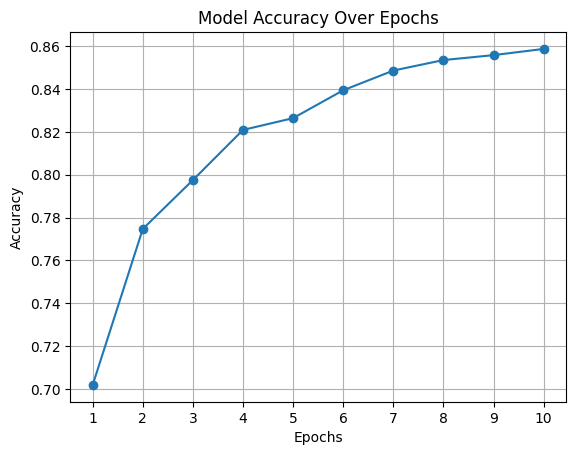

In [1]:
import matplotlib.pyplot as plt

# Define the accuracy values for each epoch
epochs = range(1, 11)  # Assuming 10 epochs
accuracy_values = [0.7019, 0.7747, 0.7975, 0.8209, 0.8264, 0.8394, 0.8486, 0.8535, 0.8558, 0.8587]  # Replace with your actual accuracy values

# Plot the graph
plt.plot(epochs, accuracy_values, marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()
